## Comparing US Shelter data with Zillow rental data.  

#### The links below will direct you to the various surveys used by the US Government to compile the CPI and in particular the Rent or Shelter component of CPI. There is also a link to how Zillow produces its rental data.  


##### US Data:

Data file contained in repo: CUSR0000SAH1.csv


US CPI latest release: 
 https://www.bls.gov/news.release/cpi.nr0.htm

US CPI Shelter background information:
https://www.bls.gov/cpi/factsheets/owners-equivalent-rent-and-rent.htm

US Consumer Expenditure surveys: 
https://www.bls.gov/opub/hom/cex/home.htm


US CPI data sources:   https://www.bls.gov/opub/hom/cpi/data.htm#:~:text=CPI%20price%20data%20are%20collected,survey%20collects%20prices%20for%20rent.


##### Zillow Data:

Data file contained in repo: zillow_oct.csv

Zillow rental data survey methodology:
https://www.zillow.com/research/methodology-zori-repeat-rent-27092/
 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
#Latest Zillow data 
z=pd.read_csv('zillow_oct.csv',index_col=0)

#Differencing to get annualised data 
z=(((z.iloc[0,4:].diff(12)/ z.iloc[0,4:]).dropna())*100)  

In [48]:
#Import latest shelter data from Fred. Already in yoy % format.
shelter=pd.read_csv('CUSR0000SAH1.csv',index_col=0).rename(columns={'CUSR0000SAH1_PC1':'shelter'})
 
#Imputed Oct/23 data and assumed no change from Sep/23
s={'Date':'2023-10-01', 'shelter': 7.14586} 
s_up=pd.DataFrame(s,index=['2023-10-01'],columns= shelter.columns)
shelter=pd.concat([shelter,s_up])

#Match up indices 
shelter=shelter[12:] 

#Convert to array for dataframe below
s=np.array(shelter).reshape(93,)

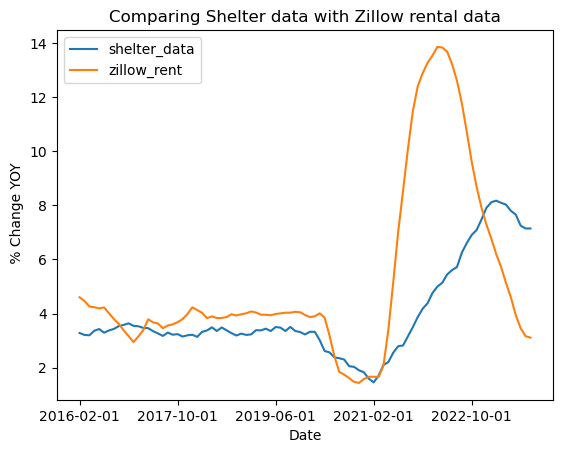

In [49]:
#Combine data into new dataframe to plot
data = {'shelter_data':s, 'zillow_rent':np.array(z).reshape(93,)}
df= pd.DataFrame(data,index=shelter.index)

#Produce plot and prep to save as pdf
rent_plot=df.plot(kind='line',title='Comparing Shelter data with Zillow rental data',xlabel="Date",ylabel=" % Change YOY").get_figure()
plt.show()

#Save plot as pdf
rent_plot.savefig('rent_plot.pdf')